In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import math
import pandas as pd
from math import exp, floor
import numpy as np

import forcing
import simulation
import model
import plot
from constants import (gravity as g,
                       glen_flow_law as n,
                       ice_density as ρ_I,
                       water_density as ρ_W,
                       glen_coefficient as A,
                       friction_coefficient as C,
                       theta as θ,
                       year as year
                      )

from scipy import stats
from scipy.interpolate import interp1d
import pandas as pd
from random import randint, gauss, random as rand
import time
import emcee
import corner
import sys


In [5]:
C = np.arange(1000000,21000000,1000000)

In [6]:
C.shape

(20,)

In [7]:
C2 = np.arange(1000000,25000000,2500000)

In [8]:
# Simulation parameters
N=2000
Sbar = .2
Sσ = Sbar/1.
Obar = forcing.Ωbar(C[0],A,θ,simulation.m(3.0))
Oσ = 0.0
dt = 1.0

In [9]:
Ω,smb=simulation.initialize_forcing(Sbar,0.5,Obar,0.0,N)
Ω2,smb2=simulation.initialize_forcing(Sbar,0.0,Obar,0.5,N)

In [10]:
forcing.Ωbar(C[0],A,θ,simulation.m(3.0))

1.5956115495115884e-15

In [14]:
b0=100
m0=-2e-3
bedn=3
timescalesm2=[]
H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(C2[4],A,θ,simulation.m(bedn)),Sbar/year,C=C2[4],bedn=bedn,alphan=3,n=3,N=100000)
print(H0)
print(L0)


100%|██████████| 100000/100000 [00:01<00:00, 95098.91it/s]

1811.0089545143471
272498.29057619226


In [ ]:
b0=100
m0=-2e-3
bedn=2
timescalesm2=[]
for i in range(len(C2)):
    H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(C[i],A,θ,simulation.m(bedn)),Sbar/year,C=C2[i],bedn=bedn,alphan=3.0,n=3)
    stability=1+ρ_W/ρ_I*(simulation.β(bedn,3.)*m0*L0)/model.grounding_thickness(model.bed(b0,m0,L0))
    print(stability)
    timetmp=H0/(Sbar*stability*simulation.α(bedn))*(simulation.α(bedn)+simulation.γ(bedn)+1-stability)
    timescalesm2.append(timetmp)
    print(forcing.Ωbar(C[i],A,θ,simulation.m(bedn)))
    print(H0)
    print(L0)

In [ ]:
def solve_accumulation(H0,L0,m0,b0,Ωbar,Sbar0,C,bedn,alphan,n):    
    while True:
        H0,L1=simulation.equilibrium(H0,L0,m0,b0,Ωbar,Sbar0/year,C=C,bedn=bedn,alphan=alphan,n=n)
        H0,L2=simulation.equilibrium(H0,L0,m0,b0,Ωbar,Sbar0/year,C=C,bedn=bedn,alphan=alphan,n=n)
        (L1-L0)/(Sbar1/Sbar0)
        (L2-L0)/(Sbar2/Sbar0)
        

In [31]:
b0=100
m0=-2e-3
bedn=2
timescalesm2=[]
for i in range(len(C2)):
    H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(C[i],A,θ,simulation.m(bedn)),Sbar/year,C=C2[i],bedn=bedn,alphan=3.0,n=3)
    stability=1+ρ_W/ρ_I*(simulation.β(bedn,3.)*m0*L0)/model.grounding_thickness(model.bed(b0,m0,L0))
    print(stability)
    timetmp=H0/(Sbar*stability*simulation.α(bedn))*(simulation.α(bedn)+simulation.γ(bedn)+1-stability)
    timescalesm2.append(timetmp)
    print(forcing.Ωbar(C[i],A,θ,simulation.m(bedn)))
    print(H0)
    print(L0)

  0%|          | 0/1000000 [00:00<?, ?it/s]/Users/andrew/projects/gia2stage/model.py:80: RuntimeWarning: invalid value encountered in double_scalars
  return Ω*grounding_thickness(bed(b0,m,L))**β
  2%|▏         | 18188/1000000 [00:00<00:10, 91411.28it/s]

nan
7.03147398661994e-14
nan
nan


  2%|▏         | 18345/1000000 [00:00<00:10, 92099.68it/s]

-5.310318283968785
4.429551043765343e-14
329.76748329868093
159594.4946859736


  2%|▏         | 18377/1000000 [00:00<00:10, 92200.05it/s]

-5.168775875155088
3.380380111943443e-14
421.9755521583377
168046.00892143196


  2%|▏         | 18105/1000000 [00:00<00:10, 90879.48it/s]

-5.074201874368994
2.790442300811881e-14
496.08190708281114
174458.94768008697


  1%|          | 8875/1000000 [00:00<00:11, 88742.89it/s]

-5.004030990363825
2.4047302773606003e-14
559.803980447368
179686.3413645837


  2%|▏         | 18450/1000000 [00:00<00:10, 92632.34it/s]

-4.948688838589206
2.129506029841766e-14
616.5627178739278
184129.40121335498


  2%|▏         | 18419/1000000 [00:00<00:10, 92469.50it/s]

-4.903253954337209
1.9215322642654528e-14
668.2333212336993
188011.2241140705


  2%|▏         | 18711/1000000 [00:00<00:10, 93903.82it/s]

-4.864875980831166
1.757868496654985e-14
715.9759021911624
191469.56143901523


  2%|▏         | 18649/1000000 [00:00<00:10, 93678.91it/s]

-4.831762735493931
1.6251172546420467e-14
760.567432813222
194595.84572636735


100%|██████████| 1000000/1000000 [00:10<00:00, 96461.79it/s]

-4.802717367435858
1.5148851478830787e-14
802.558459380522
197454.07710857762


In [122]:
b0=100
m0=-2e-3
bedn=3
timescalesm3=[]
for i in range(len(C2)):
    H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(C2[i],A,θ,simulation.m(bedn)),Sbar/year,C=C2[i],bedn=bedn,alphan=3,n=3)
    stability=1+ρ_W/ρ_I*(simulation.β(bedn,3.)*m0*L0)/model.grounding_thickness(model.bed(b0,m0,L0))
    print(stability)
    timetmp=H0/(Sbar*stability*simulation.α(3.))*(simulation.α(3.)+simulation.γ(3.)+1-stability)
    timescalesm3.append(timetmp)
    print(forcing.Ωbar(C2[i],A,θ,simulation.m(3.0)))
    print(H0)
    print(L0)

  1%|          | 8950/1000000 [00:00<00:11, 89491.12it/s]

-5.428956819350566
1.5956115495115884e-15
529.6799861892326
191456.88397862844


  2%|▏         | 18154/1000000 [00:00<00:10, 91276.29it/s]

-5.076640087655292
6.235569698420199e-16
1003.8021139185412
229023.68714016353


  1%|          | 8661/1000000 [00:00<00:11, 86600.58it/s]

-4.947889194067171
4.1621117198790527e-16
1324.3108915909477
248265.4165145448


  2%|▏         | 18273/1000000 [00:00<00:10, 91578.60it/s]

-4.871158128620704
3.2052578826627264e-16
1584.9846497790522
261834.52533335585


  2%|▏         | 18675/1000000 [00:00<00:10, 93693.05it/s]

-4.8174239311339075
2.641694897445769e-16
1811.0089545332528
272498.29057861515


  2%|▏         | 18051/1000000 [00:00<00:10, 90418.58it/s]

-4.776516581362154
2.265566659146976e-16
2013.6530725408802
281364.9913816739


  2%|▏         | 18170/1000000 [00:00<00:10, 91154.21it/s]

-4.743728965728446
1.9945144368894855e-16
2199.128987136923
288998.7694742324


  1%|          | 9053/1000000 [00:00<00:10, 90518.22it/s]

-4.716512925055385
1.7887447615020322e-16
2371.295933992175
295728.73661921354


  1%|          | 9104/1000000 [00:00<00:10, 91035.31it/s]

-4.6933406686801895
1.626532330494949e-16
2532.7475723390503
301764.82673251216


100%|██████████| 1000000/1000000 [00:10<00:00, 93486.76it/s]

-4.6732274414129
1.4949486471265914e-16
2685.3272779381055
307249.71913370804


In [123]:
b0=100
m0=-2e-3
bedn=4
timescalesm4=[]
for i in range(len(C2)):
    H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(C2[i],A,θ,simulation.m(bedn)),Sbar/year,C=C2[i],bedn=bedn,alphan=3.0,n=3)
    stability=1+ρ_W/ρ_I*(simulation.β(bedn,3.)*m0*L0)/model.grounding_thickness(model.bed(b0,m0,L0))
    print(stability)
    timetmp=H0/(Sbar*stability*simulation.α(bedn))*(simulation.α(bedn)+simulation.γ(bedn)+1-stability)
    timescalesm4.append(timetmp)
    print(forcing.Ωbar(C2[i],A,θ,simulation.m(bedn)))
    print(H0)
    print(L0)

  2%|▏         | 18475/1000000 [00:00<00:10, 92755.23it/s]

-5.452765958620751
1.6460978560885378e-16
930.4825203344587
222085.53003083085


  2%|▏         | 18386/1000000 [00:00<00:10, 92345.30it/s]

-5.144704207039266
6.042285107949896e-17
1803.909803616517
268397.03083350725


  2%|▏         | 18003/1000000 [00:00<00:10, 90532.96it/s]

-5.032471479711462
3.92585856089391e-17
2402.7109490575044
292137.4390601721


  1%|          | 8955/1000000 [00:00<00:11, 89540.27it/s]

-4.96568026218577
2.971122161260714e-17
2893.2187749925715
308884.8605377286


  2%|▏         | 18334/1000000 [00:00<00:10, 92000.35it/s]

-4.918951112740642
2.4173609439392017e-17
3320.6051580283347
322049.29243124864


  2%|▏         | 18079/1000000 [00:00<00:10, 90795.16it/s]

-4.883401746007269
2.0520532883849916e-17
3705.203898353085
332996.95028896065


  2%|▏         | 18410/1000000 [00:00<00:10, 92333.18it/s]

-4.854924592819646
1.7912642698230234e-17
4058.2717124092283
342423.4512607355


  2%|▏         | 18385/1000000 [00:00<00:10, 92175.20it/s]

-4.83129752486686
1.5948442118703523e-17
4386.8254145128285
350734.6858635717


  1%|          | 8977/1000000 [00:00<00:11, 89763.02it/s]

-4.811188948285762
1.441053861449839e-17
4695.593835325442
358189.6030860757


100%|██████████| 1000000/1000000 [00:10<00:00, 94380.62it/s]

-4.793740960402693
1.317047260924299e-17
4987.9458046494665
364964.21688149555


In [124]:
b0=100
m0=-2e-3
bedn=5
timescalesm5=[]
for i in range(len(C2)):
    H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(C2[i],A,θ,simulation.m(bedn)),Sbar/year,C=C2[i],bedn=bedn,alphan=3.0,n=3)
    stability=1+ρ_W/ρ_I*(simulation.β(bedn,3.)*m0*L0)/model.grounding_thickness(model.bed(b0,m0,L0))
    print(stability)
    timetmp=H0/(Sbar*stability*simulation.α(bedn))*(simulation.α(bedn)+simulation.γ(bedn)+1-stability)
    timescalesm5.append(timetmp)
    print(forcing.Ωbar(C2[i],A,θ,simulation.m(bedn)))
    print(H0)
    print(L0)

  1%|          | 8904/1000000 [00:00<00:11, 89029.68it/s]

-5.499342839843681
3.620828608310949e-17
1327.7899698950882
243845.5406743587


  2%|▏         | 18263/1000000 [00:00<00:10, 91663.02it/s]

-5.215172675280782
1.2747291906437754e-17
2610.0779275511873
296382.31084129965


  2%|▏         | 18400/1000000 [00:00<00:10, 92309.60it/s]

-5.1118196780438865
8.134832081241758e-18
3496.757782456151
323324.3508973281


  1%|          | 9214/1000000 [00:00<00:10, 92128.89it/s]

-5.050360873964803
6.085442967262464e-18
4226.2655444898255
342333.40130538854


  2%|▏         | 18695/1000000 [00:00<00:10, 93694.46it/s]

-5.007384500585569
4.908860950720102e-18
4863.795917875291
357277.09453853813


  2%|▏         | 18486/1000000 [00:00<00:10, 92606.64it/s]

-4.974702531675082
4.1386925085232014e-18
5438.803533857647
369705.28106526943


  2%|▏         | 18268/1000000 [00:00<00:10, 91521.25it/s]

-4.948530243500111
3.5923169636433445e-18
5967.637033803864
380407.1720281262


  1%|          | 8687/1000000 [00:00<00:11, 86861.18it/s]

-4.926820905486033
3.182962541377776e-18
6460.50816461751
389843.31092406175


  2%|▏         | 18497/1000000 [00:00<00:10, 92776.12it/s]

-4.90834839184858
2.8639046573876933e-18
6924.310561632761
398307.5348391143


100%|██████████| 1000000/1000000 [00:10<00:00, 94065.74it/s]

-4.892322946172651
2.6076627072814426e-18
7363.96235018095
405999.5835896338


In [117]:
b0=100
m0=-2e-3

Cthwaites2=np.array([10**2*1000/((125/(3.17098e8))**(1/2)),3*10*1000/((100/(3.17098e8))**(1/2-1))])
bedn=2
timescalethwaites2=[]
for i in range(len(Cthwaites2)):
    H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(Cthwaites2[i],A,θ,simulation.m(bedn)),Sbar/year,C=Cthwaites2[i],bedn=bedn,alphan=3.0,n=3)
    stability=1+ρ_W/ρ_I*(simulation.β(bedn,3.)*m0*L0)/model.grounding_thickness(model.bed(b0,m0,L0))
    print(stability)
    timetmp=H0/(Sbar*stability*simulation.α(bedn))*(simulation.α(bedn)+simulation.γ(bedn)+1-stability)
    timescalethwaites2.append(timetmp)
    print(H0)
    print(L0)

  3%|▎         | 32731/1000000 [00:00<00:05, 164438.04it/s]

-4.205993794403075
2210.0575211437276
298282.89619202825


100%|██████████| 1000000/1000000 [00:05<00:00, 171019.54it/s]

nan
nan
nan


In [172]:
10**2*1000

100000

In [129]:
b0=100
m0=-2e-3
Cthwaites3=np.array([10**2*1000/((125/(3.17098e8))**(1/3)),3*10*1000/((100/(3.17098e8))**(1/3))])
bedn=3
timescalethwaites3=[]
for i in range(len(Cthwaites3)):
    H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(Cthwaites3[i],A,θ,simulation.m(bedn)),Sbar/year,C=Cthwaites3[i],bedn=bedn,alphan=3.0,n=3)
    stability=1+ρ_W/ρ_I*(simulation.β(bedn,3.)*m0*L0)/model.grounding_thickness(model.bed(b0,m0,L0))
    print(stability)
    timetmp=H0/(Sbar*stability*simulation.α(bedn))*(simulation.α(bedn)+simulation.γ(bedn)+1-stability)
    timescalethwaites3.append(timetmp)
    print(H0)
    print(L0)

  3%|▎         | 33767/1000000 [00:00<00:05, 169570.31it/s]

-4.774520191475387
2024.3212481173305
281815.83142639877


100%|██████████| 1000000/1000000 [00:05<00:00, 175751.44it/s]

-5.020028772842147
1129.9402342721962
237003.63730225453


In [128]:
b0=100
m0=-2e-3
Cthwaites4=np.array([10**2*1000/((125/(3.17098e8))**(1/4)),3*10*1000/((100/(3.17098e8))**(1/4))])
bedn=4
timescalethwaites4=[]
for i in range(len(Cthwaites2)):
    H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(Cthwaites4[i],A,θ,simulation.m(bedn)),Sbar/year,C=Cthwaites4[i],bedn=bedn,alphan=3.0,n=3)
    stability=1+ρ_W/ρ_I*(simulation.β(bedn,3.)*m0*L0)/model.grounding_thickness(model.bed(b0,m0,L0))
    print(stability)
    timetmp=H0/(Sbar*stability*simulation.α(bedn))*(simulation.α(bedn)+simulation.γ(bedn)+1-stability)
    timescalethwaites4.append(timetmp)
    print(H0)
    print(L0)

  2%|▏         | 16275/1000000 [00:00<00:06, 162736.96it/s]

-5.116336478584708
1934.1381552583518
273946.8160325193


100%|██████████| 1000000/1000000 [00:05<00:00, 176607.58it/s]

-5.38926617494424
1053.4778815703644
229951.11700609443


In [127]:
b0=100
m0=-2e-3
Cthwaites5=np.array([10**2*1000/((125/(3.17098e8))**(1/5)),3*10*1000/((100/(3.17098e8))**(1/5))])
bedn=5
timescalethwaites5=[]
for i in range(len(Cthwaites2)):
    H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(Cthwaites5[i],A,θ,simulation.m(bedn)),Sbar/year,C=Cthwaites5[i],bedn=bedn,alphan=3.0,n=3)
    stability=1+ρ_W/ρ_I*(simulation.β(bedn,3.)*m0*L0)/model.grounding_thickness(model.bed(b0,m0,L0))
    print(stability)
    timetmp=H0/(Sbar*stability*simulation.α(bedn))*(simulation.α(bedn)+simulation.γ(bedn)+1-stability)
    timescalethwaites5.append(timetmp)
    print(H0)
    print(L0)

  2%|▏         | 16368/1000000 [00:00<00:06, 163671.57it/s]

-5.344455195904893
1880.8122593506732
269337.6203964384


100%|██████████| 1000000/1000000 [00:05<00:00, 173550.73it/s]

-5.63588257781821
1008.6683926749732
225830.74847784423


In [160]:
b0=100
m0=-2e-3
H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(1200000,A,θ,simulation.m(3.0)),Sbar/year,1200000,n=3)
print(forcing.Ωbar(1200000,A,θ,simulation.m(3.0)))
print(H0)
print(L0)

100%|██████████| 1000000/1000000 [00:03<00:00, 303029.56it/s]

1.391685930448929e-15
581.0746299954363
196366.39433120875


In [ ]:
H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(C[i],A,θ,simulation.m(bedn)),Sbar/year,C=C2[i],bedn=bedn,n=3)
stability=1+ρ_W/ρ_I*(simulation.β(bedn,3.)*m0*L0)/model.grounding_thickness(model.bed(b0,m0,L0))
print(stability)
timetmp=H0/(Sbar*stability*simulation.α(5.))*(simulation.α(3.)+simulation.γ(3.)+1-stability)
print(timetmp)
print(forcing.Ωbar(C[i],A,θ,simulation.m(3.0)))
print(H0)
print(L0)


H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(C[i],A,θ,simulation.m(bedn)),Sbar/year,C=C2[i],bedn=bedn,n=3)
stability=1+ρ_W/ρ_I*(simulation.β(bedn,3.)*m0*L0)/model.grounding_thickness(model.bed(b0,m0,L0))
print(stability)
timetmp=H0/(Sbar*stability*simulation.α(3.))*(simulation.α(3.)+simulation.γ(3.)+1-stability)
timescalesm5.append(timetmp)
print(forcing.Ωbar(C[i],A,θ,simulation.m(3.0)))
print(H0)
print(L0)



In [161]:
b0=100
m0=-2e-3
H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(12500000,A,θ,simulation.m(3.0)),Sbar/year,12500000,n=3)
print(forcing.Ωbar(12500000,A,θ,simulation.m(3.0)))
print(H0)
print(L0)

100%|██████████| 1000000/1000000 [00:03<00:00, 304119.04it/s]

2.400184691383061e-16
1934.9332816501471
277990.67697912885


In [62]:
(1/4+3+3)/(1/4+1)

5.0

In [51]:
forcing.Ωbar(C5,A,θ,simulation.m(3.0))

2.0678427460299495e-16

In [49]:
b0=100
m0=-2e-3

H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(C5,A,θ,simulation.m(3.0)),Sbar/year,C5,n=3)
print(H0)
print(L0)

100%|██████████| 1000000/1000000 [00:03<00:00, 309955.37it/s]

2144.8824365592236
286809.6109728522


In [52]:
C

7624000.0

In [54]:
forcing.Ωbar(C,A,θ,simulation.m(3.0))

3.477683104889963e-16

In [53]:
b0=100
m0=-2e-3

H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(C,A,θ,simulation.m(3.0)),Sbar/year,C,n=3)
print(H0)
print(L0)

100%|██████████| 1000000/1000000 [00:03<00:00, 309456.31it/s]

1498.425254504684
257496.58963996064


In [107]:
C1

3812000.0

In [103]:
forcing.Ωbar(C1,A,θ,simulation.m(1.0))

6.993721511731123e-11

In [106]:
b0=100
m0=-2e-3

H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(C1,A,θ,simulation.m(3.0)),Sbar/year,C,n=3)
print(H0)
print(L0)

100%|██████████| 1000000/1000000 [00:03<00:00, 306934.87it/s]

1411.5353768163445
231937.34261876575


In [58]:
forcing.Ωbar(C2,A,θ,simulation.m(3.0))

9.836373225142323e-16

In [59]:
b0=100
m0=-2e-3

H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(C2,A,θ,simulation.m(3.0)),Sbar/year,C2,n=3)
print(H0)
print(L0)

100%|██████████| 1000000/1000000 [00:03<00:00, 309762.06it/s]

735.5061676768229
209643.3717718616


In [60]:
forcing.Ωbar(C3,A,θ,simulation.m(3.0))

1.3332249831739247e-15

In [61]:
b0=100
m0=-2e-3

H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(C3,A,θ,simulation.m(3.0)),Sbar/year,C3,n=3)
print(H0)
print(L0)

100%|██████████| 1000000/1000000 [00:03<00:00, 308408.77it/s]

598.2291659480779
197943.7492475295


In [35]:
b0=100
m0=-2e-3

H0,L0=simulation.equilibrium(1413,184000,m0,b0,forcing.Ωbar(C4,A,θ,simulation.m(3.0)),Sbar/year,C4,n=3)
print(H0)
print(L0)

100%|██████████| 1000000/1000000 [00:03<00:00, 306446.09it/s]

516.8984552424217
190189.5866892106


In [154]:
timescales=np.array([3040,4728,6183,7527,8747,9963,11094,12279,13371,14445,15614,16663,17739,18774,19884,21038,22089,23129,24280,25391])

In [171]:
Cthwaites3

array([13638329.01503724,  4407433.37160969])

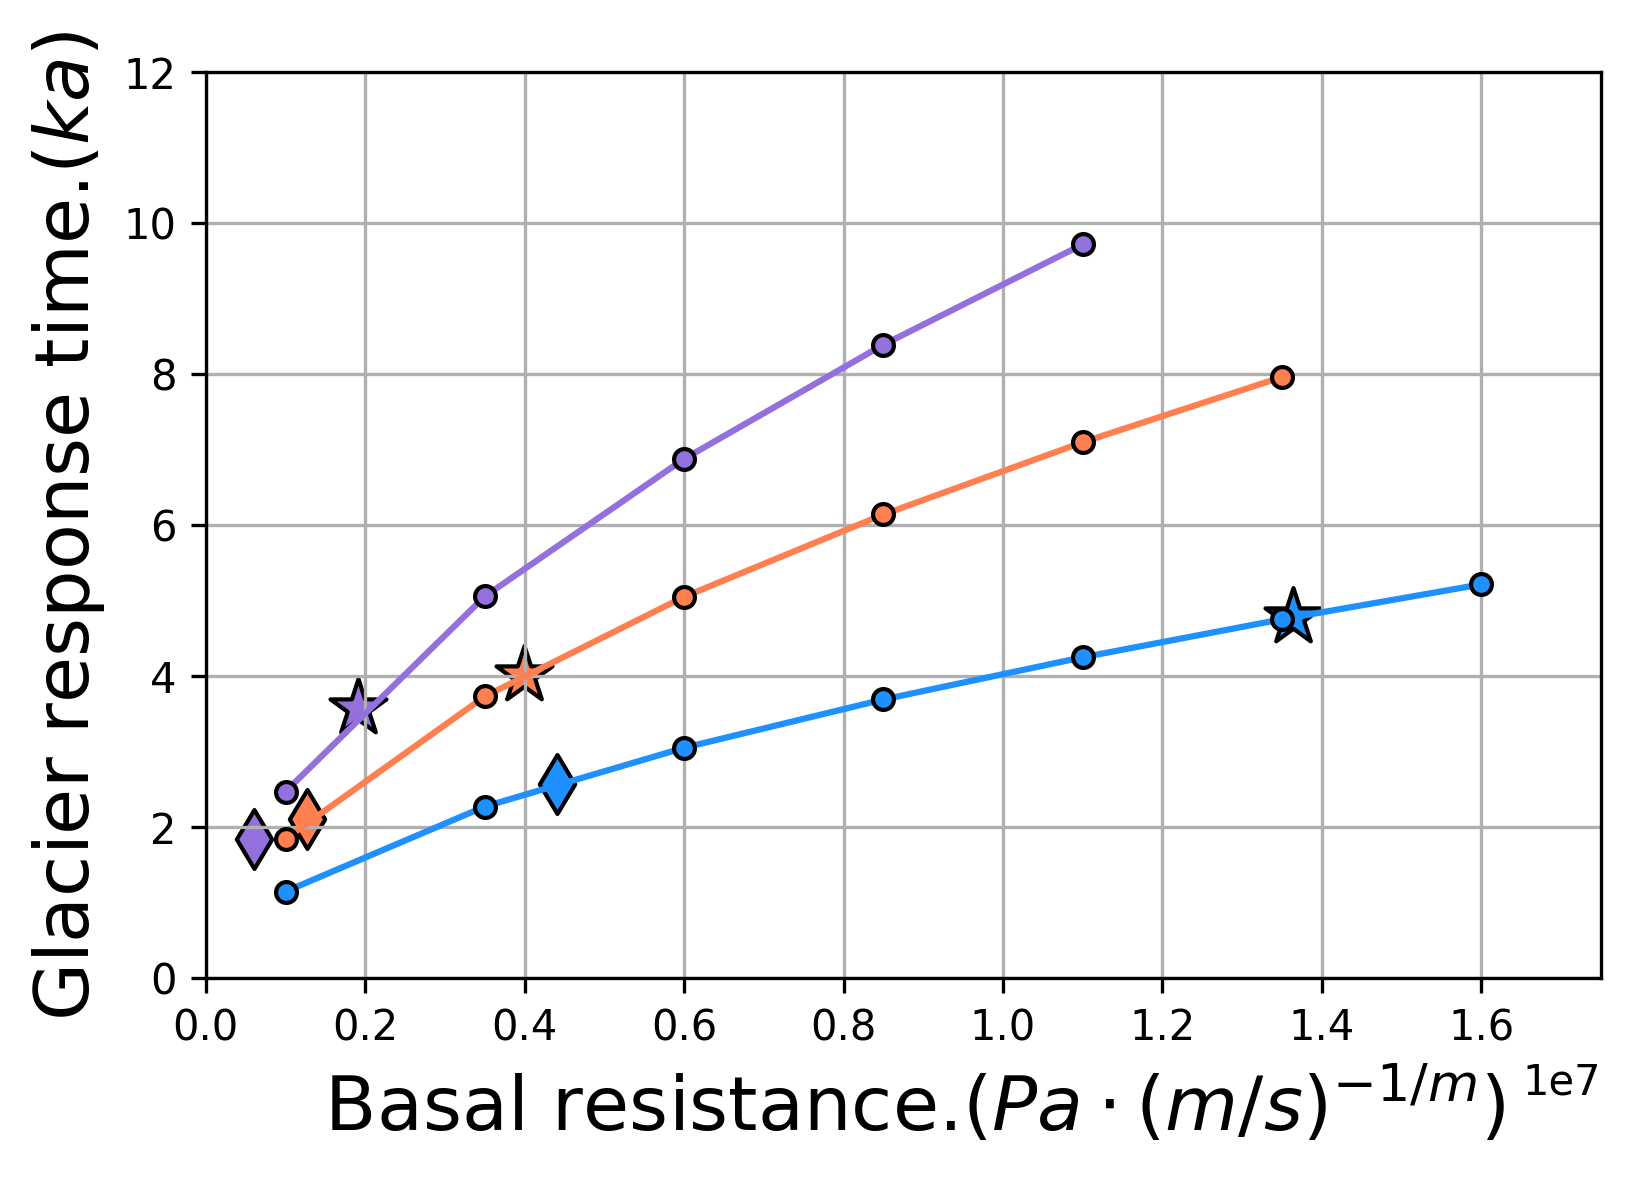

In [168]:
fig,ax=plt.subplots(dpi=300,)
ax.grid(True)
ax.set_xlabel(r' Basal resistance.($Pa\cdot(m/s)^{-1/m}}$)',fontsize=18)
ax.set_ylabel('Glacier response time.($ka$)',fontsize=18)
ax.set_xlim(0,1.75e7)
ax.set_ylim(0,12)
#plt.plot(C2,-np.array(timescalesm2)/1000,marker='o',markersize=5,markeredgecolor='black',color='forestgreen')
plt.plot(C2[:7],-np.array(timescalesm3[:7])/1000,marker='o',markersize=5,markeredgecolor='black',color='dodgerblue')
plt.scatter(Cthwaites3[0],-np.array(timescalethwaites3)[0]/1000,s=200,marker='*',edgecolor='black',color='dodgerblue')
plt.scatter(Cthwaites3[1],-np.array(timescalethwaites3)[1]/1000,s=100,marker='d',edgecolor='black',color='dodgerblue')

plt.plot(C2[:6],-np.array(timescalesm4[:6])/1000,marker='o',markersize=5,markeredgecolor='black',color='coral')
plt.scatter(Cthwaites4[0],-np.array(timescalethwaites4)[0]/1000,s=200,marker='*',edgecolor='black',color='coral')
plt.scatter(Cthwaites4[1],-np.array(timescalethwaites4)[1]/1000,s=100,marker='d',edgecolor='black',color='coral')

plt.plot(C2[:5],-np.array(timescalesm5[:5])/1000,marker='o',markersize=5,markeredgecolor='black',color='mediumpurple')
plt.scatter(Cthwaites5[0],-np.array(timescalethwaites5)[0]/1000,s=200,marker='*',edgecolor='black',color='mediumpurple')
plt.scatter(Cthwaites5[1],-np.array(timescalethwaites5)[1]/1000,s=100,marker='d',edgecolor='black',color='mediumpurple')


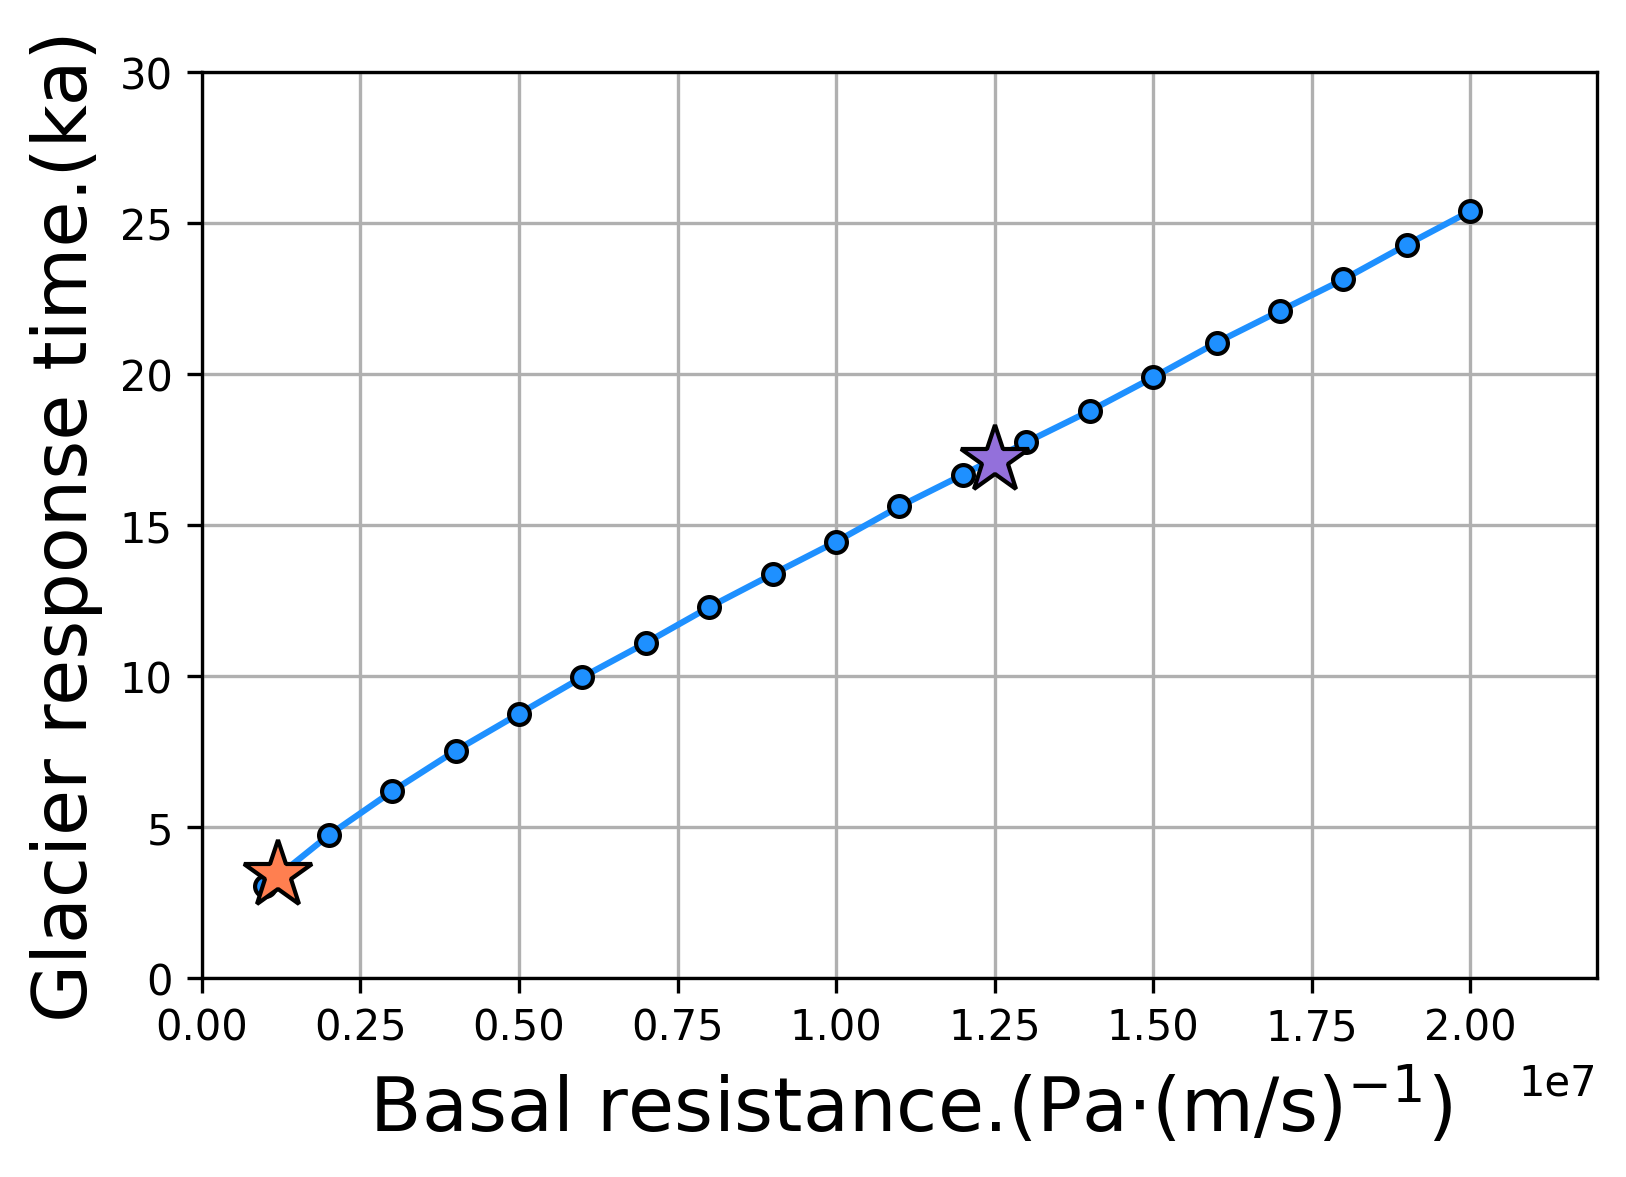

In [218]:
fig,ax=plt.subplots(dpi=300,)
ax.grid(True)
ax.set_xlabel(r' Basal resistance.(Pa$\cdot$(m/s)$^{-1}$)',fontsize=18)
ax.set_ylabel('Glacier response time.(ka)',fontsize=18)
ax.set_xlim(0,2.2e7)
ax.set_ylim(0,30)
plt.plot(C,timescales/1000,marker='o',markersize=5,markeredgecolor='black',color='dodgerblue')
plt.plot(1200000,(3424/1000),marker='*',markersize=17,markeredgecolor='black',color='coral')
plt.plot(12500000,(17160/1000),marker='*',markersize=17,markeredgecolor='black',color='mediumpurple')


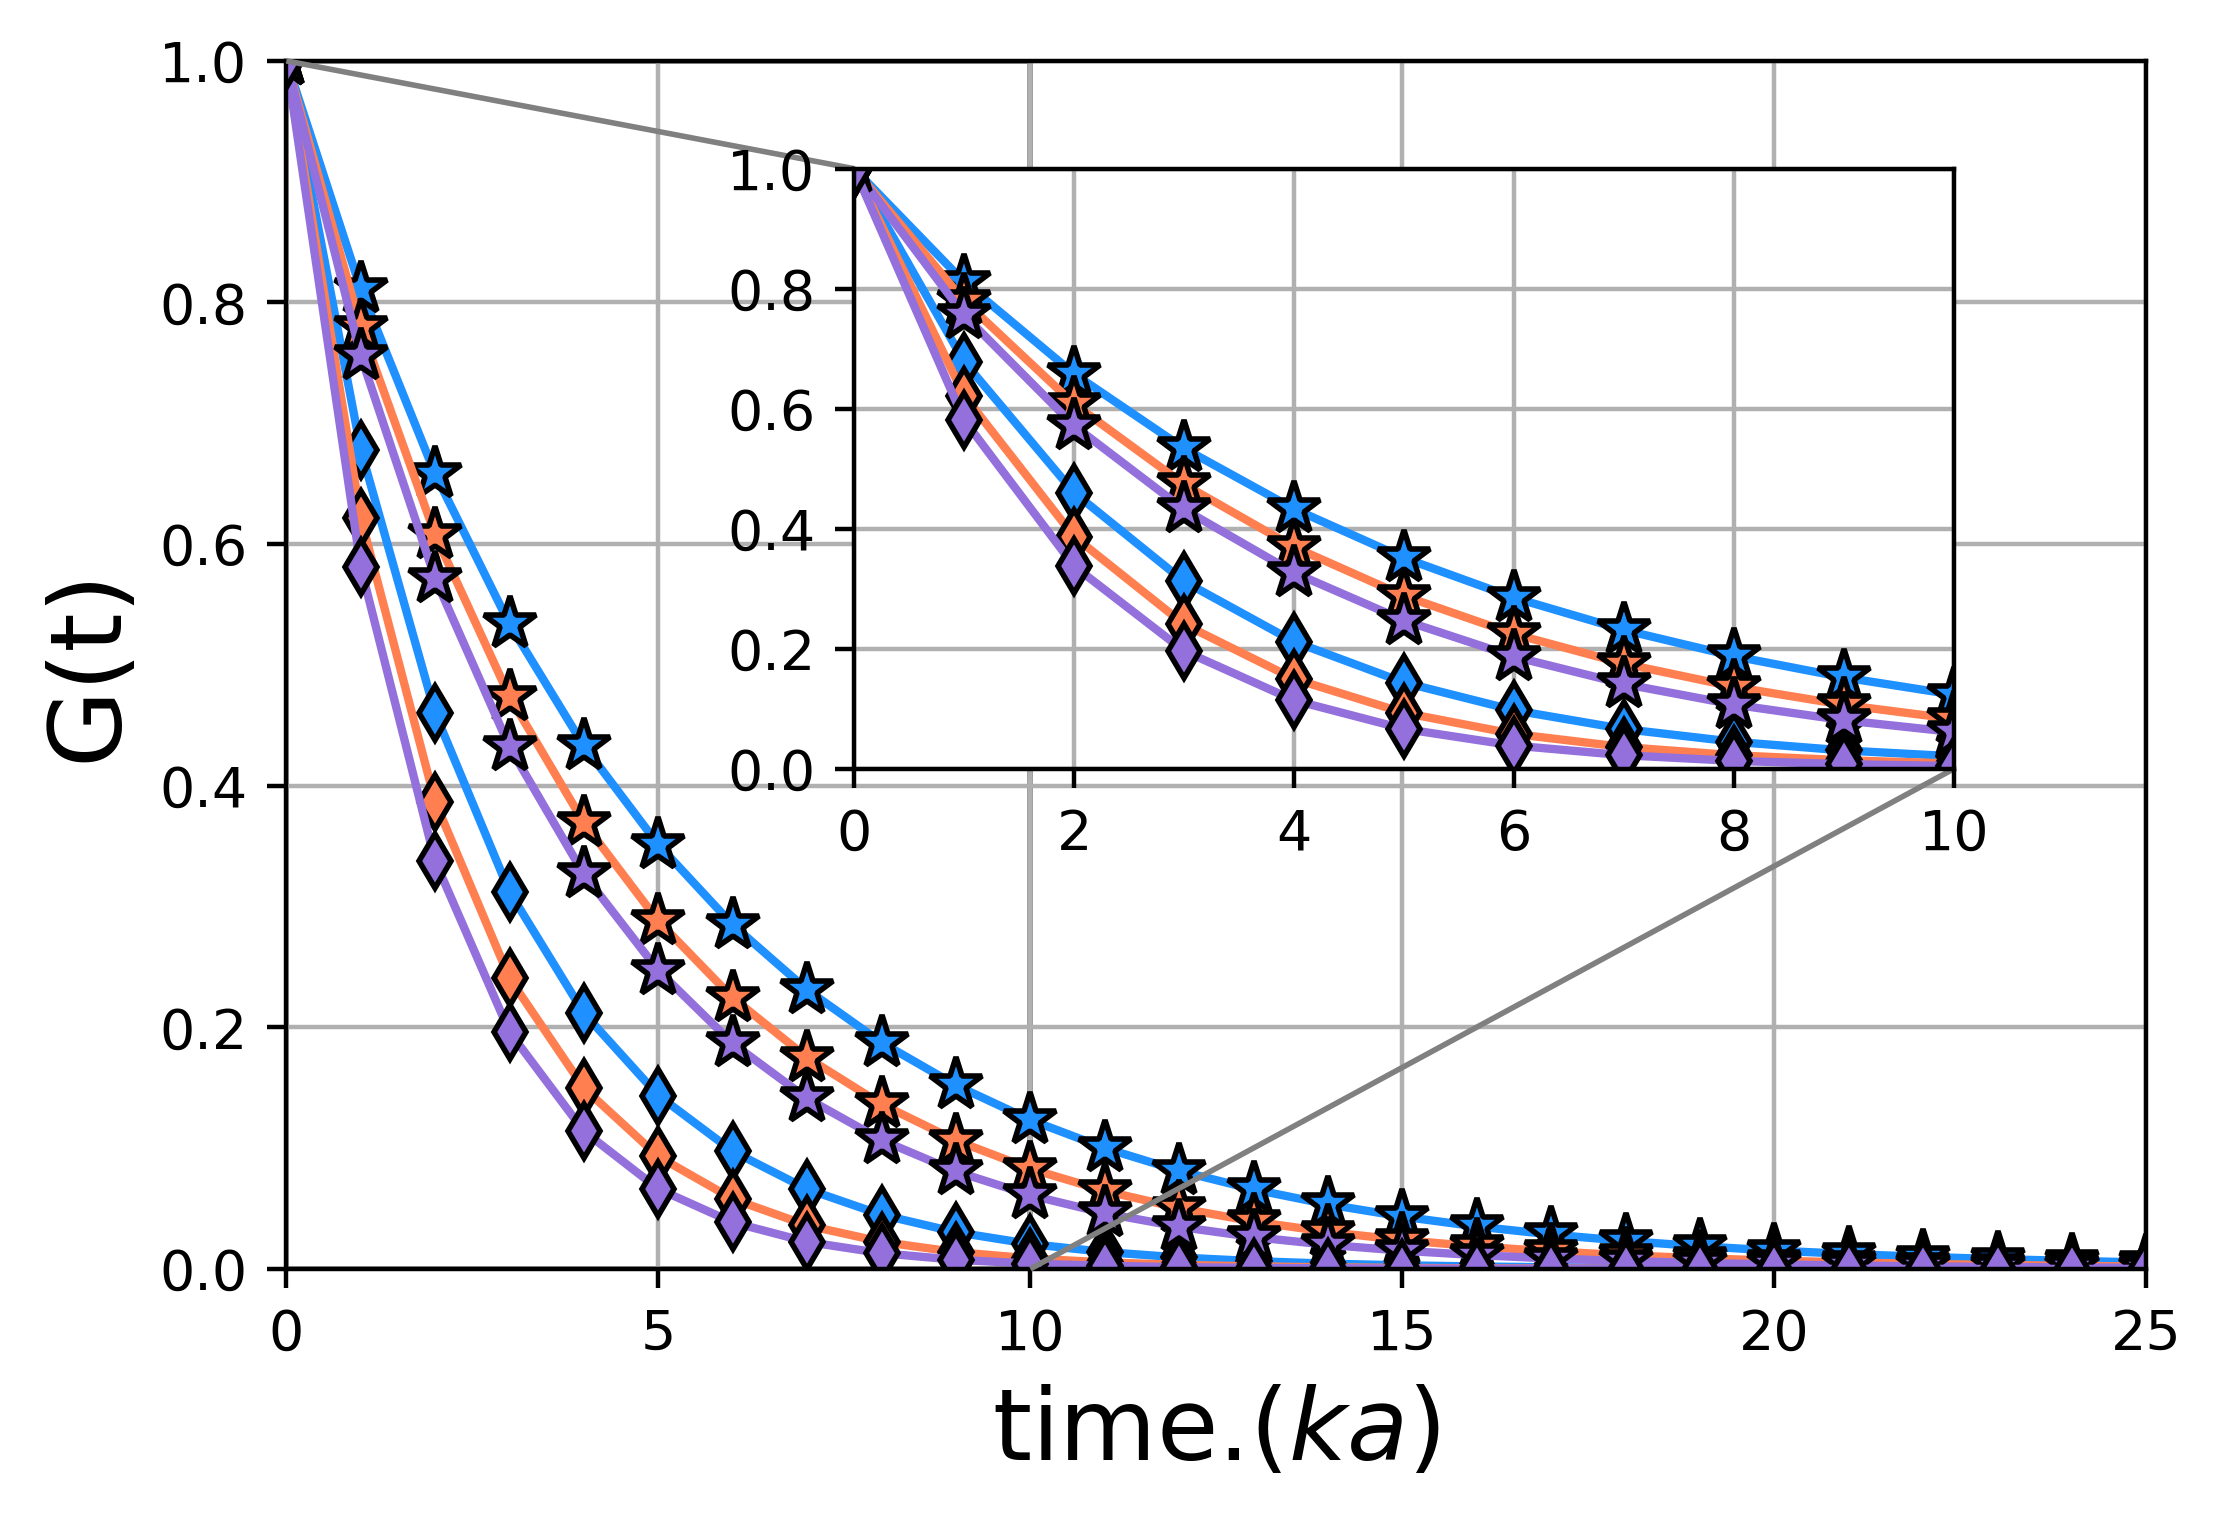

In [170]:
t = np.linspace(0,50000,51)
α1=1/timescalethwaites3[0]
α2=1/timescalethwaites3[1]
α3=1/timescalethwaites4[0]
α4=1/timescalethwaites4[1]
α5=1/timescalethwaites5[0]
α6=1/timescalethwaites5[1]

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig1 = plt.figure(dpi=400)
ax1 = fig1.add_subplot(111)
ax1.plot(t/1000,np.exp(α1*t),color='dodgerblue',marker='*',markeredgecolor='black',markersize=10)
ax1.plot(t/1000,np.exp(α2*t),color='dodgerblue',marker='d',markeredgecolor='black',markersize=7)
ax1.plot(t/1000,np.exp(α3*t),color='coral',marker='*',markeredgecolor='black',markersize=10)
ax1.plot(t/1000,np.exp(α4*t),color='coral',marker='d',markeredgecolor='black',markersize=7)
ax1.plot(t/1000,np.exp(α5*t),color='mediumpurple',marker='*',markeredgecolor='black',markersize=10)
ax1.plot(t/1000,np.exp(α6*t),color='mediumpurple',marker='d',markeredgecolor='black',markersize=7)

plt.xlim(0,25)
plt.ylim(0,1)
plt.xlabel('time.($ka$)',fontsize=18)
plt.ylabel('G(t)',fontsize=18)
plt.grid()

ax2 = inset_axes(ax1, 2.75,1.5 , loc=2,bbox_to_anchor=(.35, 0.83),bbox_transform=ax1.figure.transFigure) # no zoom
ax2.plot(t/1000,np.exp(α1*t),color='dodgerblue',markeredgecolor='black',marker='*',markersize=10)#,label=r'$G(t) = e^{-\frac{1}{\tau_f} t}$')
ax2.plot(t/1000,np.exp(α2*t),color='dodgerblue',markeredgecolor='black',marker='d',markersize=7)#,label=r'$G(t) = e^{-\frac{1}{\tau_s} t}$')
ax2.plot(t/1000,np.exp(α3*t),color='coral',markeredgecolor='black',marker='*',markersize=10)#,label=r'$G(t) = e^{-\frac{1}{\tau_f} t}$')
ax2.plot(t/1000,np.exp(α4*t),color='coral',markeredgecolor='black',marker='d',markersize=7)#,label=r'$G(t) = e^{-\frac{1}{\tau_s} t}$')
ax2.plot(t/1000,np.exp(α5*t),color='mediumpurple',markeredgecolor='black',marker='*',markersize=10)#,label=r'$G(t) = e^{-\frac{1}{\tau_f} t}$')
ax2.plot(t/1000,np.exp(α6*t),color='mediumpurple',markeredgecolor='black',marker='d',markersize=7)#,label=r'$G(t) = e^{-\frac{1}{\tau_s} t}$')
#ax2.legend()
# clabel(C,fontsize=14,fmt='%2.1f')#,manual=True)
# subregion of the original image
x1,x2,y1,y2 = 0,10,0,1
ax2.set_xlim(x1,x2)
ax2.set_ylim(y1,y2)
#plt.xticks(visible=False)

ax2.yaxis.get_major_locator().set_params(nbins=7)
ax2.xaxis.get_major_locator().set_params(nbins=7)

plt.setp(ax2.get_xticklabels(),visible=True)#, visible=False)
plt.setp(ax2.get_yticklabels(),visible=True)#, visible=False)
# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec="0.5")
plt.grid()
plt.draw()
plt.show()

In [144]:
timescalethwaites3

[-4777.248381863339, -2575.636214130432]